<a href="https://colab.research.google.com/github/MaheshBabuKamineni/curriculum/blob/master/Mahesh'sDMassignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans

In [214]:
data = pd.read_json('News_Category_Dataset_v2.json', lines=True)
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [215]:
data['headline_processed'] = data.headline.str.replace('[{}]'.format(string.punctuation), '').str.lower()
data['short_description_processed'] = data.short_description.str.replace('[{}]'.format(string.punctuation), '').str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [216]:
data.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [217]:
stopwords = [ "a", "about", "above", "after", "again", "against" "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [218]:
def remove_stopwords(text):
    
    words = [word for word in text if word not in stopwords.words('english')]
    return words

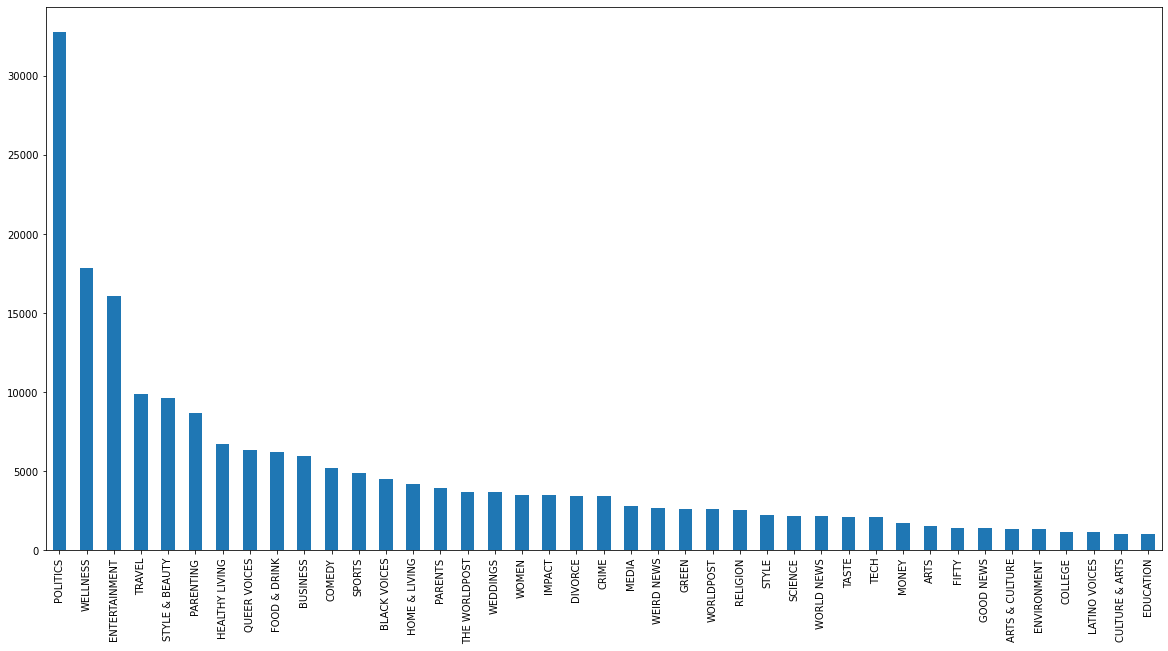

In [219]:
data = data[["category", "headline"]]
data.category.value_counts().plot.bar(figsize = (20,10))

In [220]:
mapper = {}

for i,category in enumerate(data["category"].unique()):
        mapper[category] = i

data["category_target"] = data["category"].map(mapper)
data.head()


,category,headline,category_target
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,1


In [221]:
from sklearn.feature_extraction.text import CountVectorizer

In [222]:
vect = CountVectorizer(stop_words = 'english')
X_train_matrix = vect.fit_transform(data["headline"]) 

In [223]:
print (X_train_matrix.shape)

(200853, 55356)


In [224]:
print ("shape of the matrix ", X_train_matrix.shape)
print ("one example" , data["headline"][1515])

shape of the matrix  (200853, 55356)
one example 'Crocodile Hunter' Steve Irwin Receives Hollywood Walk Of Fame Star


In [225]:
y = data["category_target"]

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_matrix, y, test_size=0.1)
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))
predicted_result=clf.predict(X_test)
from sklearn.metrics import classification_report


0.6178229433469604
0.5333067808423778


In [227]:
prob = {}
All = data["category_target"].value_counts().sum()

In [228]:
for i, category in enumerate (data["category_target"].value_counts(sort = True)):
    prob[i] = category / All

print("Probability for each class:")

print("\n".join("{}: {}".format(k, v) for k, v in prob.items()))

Probability for each class:
0: 0.16299980582814297
1: 0.08875645372486346
2: 0.07994901744061578
3: 0.04922505513982863
4: 0.04804010893539056
5: 0.043200748806340956
6: 0.03332785669121198
7: 0.031435925776562956
8: 0.030997794406854764
9: 0.029558931158608536
10: 0.025765111798180758
11: 0.0243162910188048
12: 0.022543850477712554
13: 0.02088592154461223
14: 0.019691017809044427
15: 0.018242197029668464
16: 0.01817747307732521
17: 0.017375891821381807
18: 0.017221550088870965
19: 0.017057250825230394
20: 0.01695269674836821
21: 0.014015225065097359
22: 0.013293304058191811
23: 0.013054323311078251
24: 0.01284023639178902
25: 0.012725724783797106
26: 0.01122213758320762
27: 0.010843751400277815
28: 0.010838772634712949
29: 0.010435492623958816
30: 0.010365789906050693
31: 0.008498752819226001
32: 0.007512957237382563
33: 0.006975250556377052
34: 0.006960314259682454
35: 0.006666567091355369
36: 0.006586906842317516
37: 0.005695707806206529
38: 0.005621026322733542
39: 0.00512812853181